# Unsupervised Learning

## Project: Creating Customer Segments

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. we will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products we could purchase.

In [2]:
# Display a description of the dataset
describe = data.describe()
display(describe)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, we will add **three** randomly chosen indices to the `indices` list which will represent the customers to track. 

**NOTE:** I have used a random function below. So, every time you run this block of code you get a different table. 

[157, 111, 2]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17773,1366,2474,3378,811,418
1,12579,11114,17569,805,6457,1519
2,6353,8808,7684,2405,3516,7844


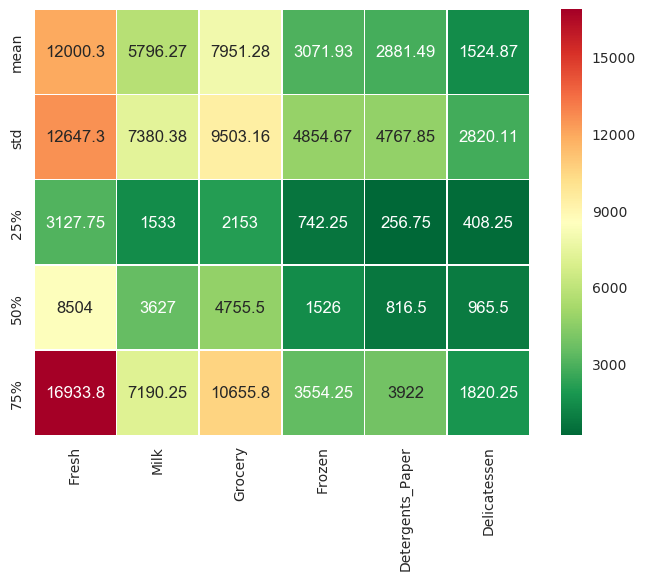

In [30]:
# Select three indices of your choice you wish to sample from the dataset
import random
import seaborn as sns
indices = random.sample(range(0,data.shape[0]),3)
print indices
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
# Create a heatmap of the describe table to compare our samples with the rest of the data
heatmap_data = describe.loc[~describe.index.isin(['count','min','max'])]
display(sns.heatmap(heatmap_data, cmap='RdYlGn_r', linewidths=0.5, annot=True,fmt='g'))

Let's Consider the total purchase cost of each product category and the statistical description of the dataset above for our sample customers to see What kind of establishment (customer) could each of the three samples represent: 

* custumer **index(0)**: This custumer consumes higher than median grocery and way more than avergage frozen products. All other products are well below average. One possibility is that it can be a restaurant which consumes a lot of fresh and frozen products. 
* custumer **index(1)**: This customer consumes higher than median in all items except for frozen products. One possibility is that it can be a small grocery store. 
* custumer **index(2)**: This customer is particularly high on Delicatessen (higher than 75% percentile), Milk, Grocery, Detergent/Paper and Frozen foods. It's lower than median for fresh products. One possibility for this customer is a cafe, which consumers a lot of milk and delicatessn, frozen material and grocery. Detergents and papers may also be used a lot for washing dishes and cleaning tables. 

### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we will implement the following:
 - Assign `new_data` a copy of the data by removing a randomly chosen feature using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as our target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV


# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
X = data.drop('Grocery', axis=1)
y = data[['Grocery']]


# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a decision tree regressor and use grid seach to avoid overfitting

param_grid = {'max_depth': np.arange(2, 10)}
dt = DecisionTreeRegressor(random_state = 0)
grid_search = GridSearchCV(dt,param_grid=param_grid,cv=10)
grid_search.fit(X_train, y_train)

# predict grocery for X_test
y_pred = grid_search.best_estimator_.predict(X_test)

# Report the score of the prediction using the testing set

print "score:",r2_score(y_test,y_pred)

score: 0.687570093343


In the code block above, I selected "Grocery" as response variable in order to see if there are any association between this variable and others. I chose a Decision Tree Regressor and got a R-square score of 0.68 after a 10-fold cross validation and choosing best model with optimom max_depth. This means that "Grocery" is well correlated with other variables and having that in our model will not add that much information gain. In contrast, if we do the same process for "Fresh" for instance, we will get an average R_square of 0.061 which is very low, and therefore having "Fresh" in as our independent variable will add a lot of information gain. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

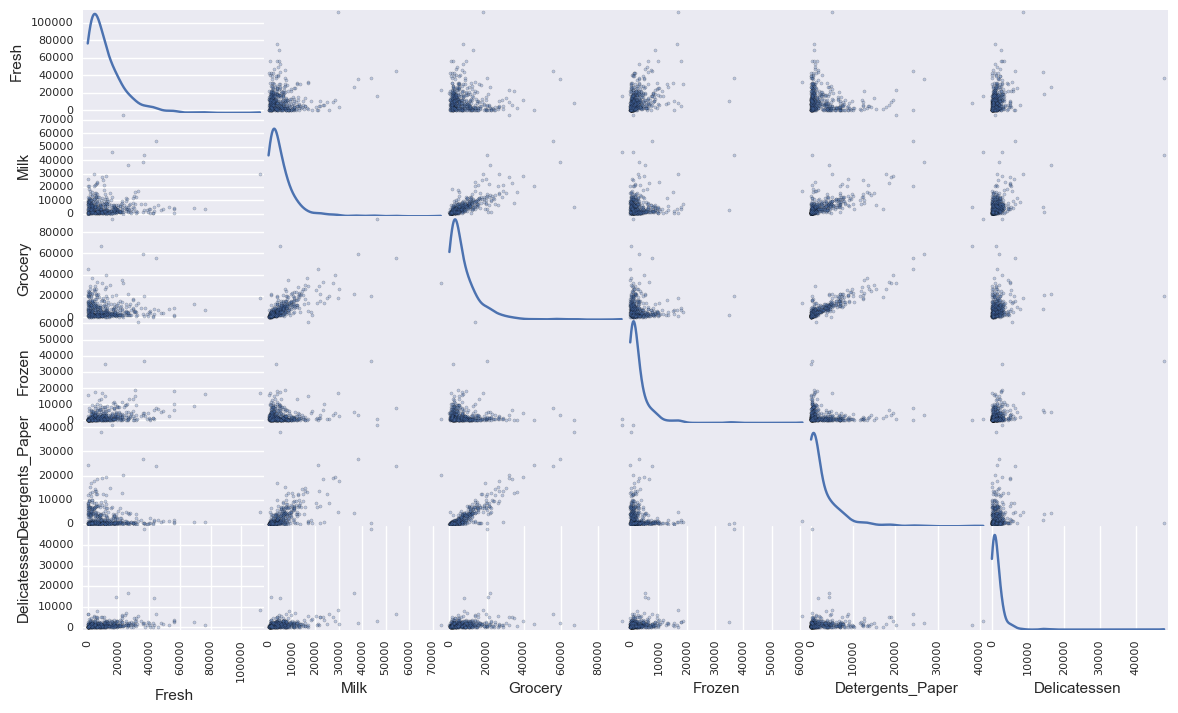

In [23]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

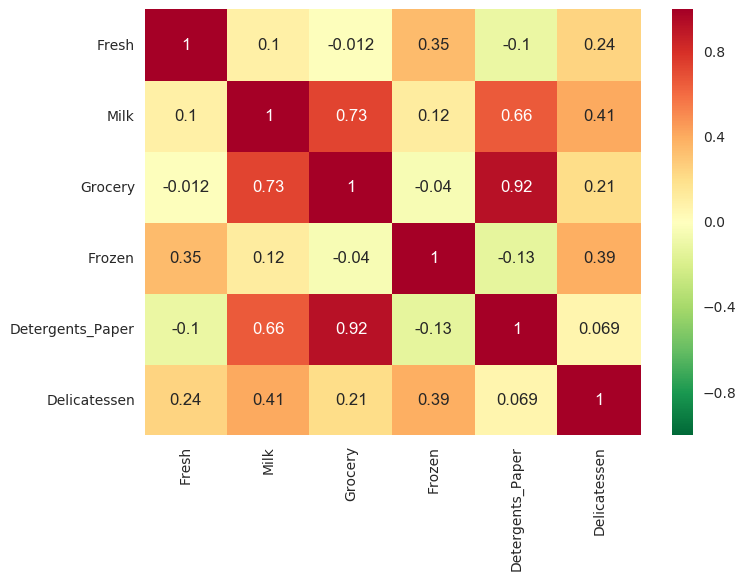

In [24]:
# another way to visualize the correlations
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r')


The heatmap plotted above represents the correlation matrix netween different variables. Three correlations are evident in this vidualization: 

| Pair of Variables         | Correlation coefficient |
|---------------------------|-------------------------|
|Grocery & Detergents_paper |0.92                     |
|Detergents_Paper &   Milk  |0.73                     |
|Grocery & Milk             |0.66                     |

It is important to note that these correlations approve our previous conclusion about "Grocey". recall that we found a non-linear association between "Grocery" and other variables with R-square of 0.68. None of the variables have normal distribution and all of them are significantly skewed to the right due to the presence of outliers. Checking normality is an important step for us as distance-based clustering methods such as k-means work best when clusters are normally distributed. In this case, it looks like we need some data transformation beforehand. 

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, we will implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

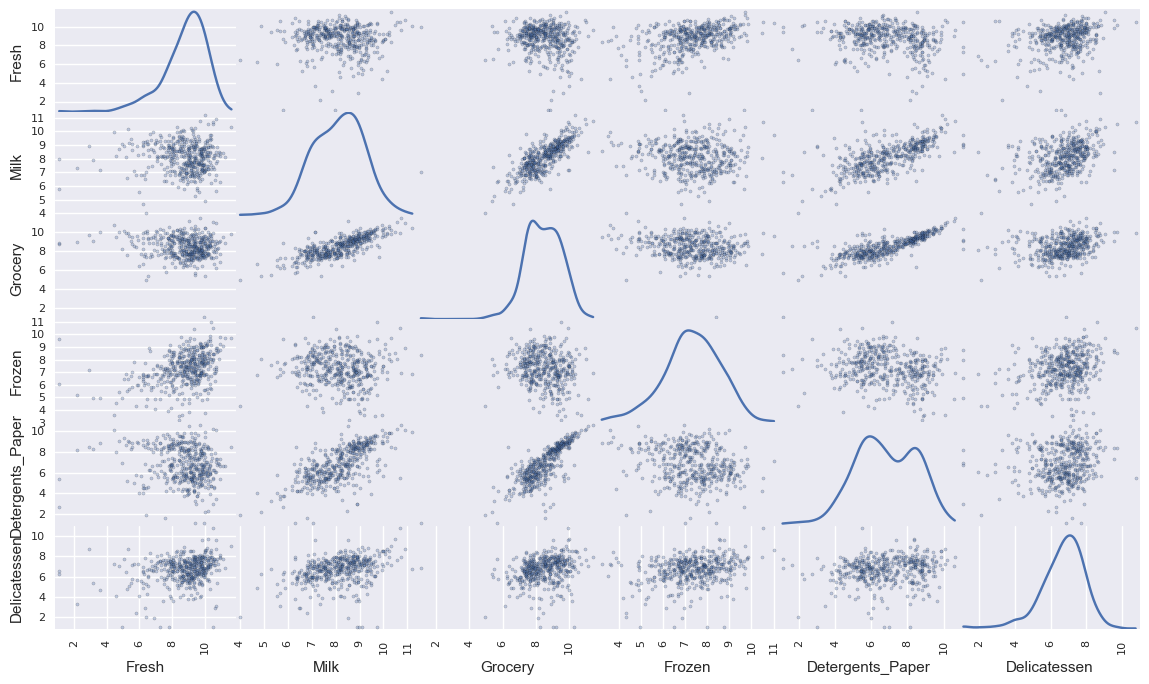

In [36]:
# Scale the data using the natural logarithm
log_data = data.apply(np.log, axis=1)

# Scale the sample data using the natural logarithm
sample = data[data.index.isin([157,111,2])]
log_samples =sample .apply(np.log, axis=1)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [37]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
111,9.439784,9.315961,9.773891,6.690842,8.772920,7.325808
157,9.785436,7.219642,7.813592,8.125039,6.698268,6.035481


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we will implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`.
 - Assign the value of the 75th percentile for the given feature to `Q3`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [112]:
outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step =(Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    outliers.append(feature_outliers.index.tolist())
    
#  Select the indices for data points that we want to remove
outliers  = list(set([i for j in outliers for i in j]))
print "The identified outliers are:",outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The identified outliers are: [128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]


There are several data points that are outliers in different features: 

| Outlier index | features                     |
|---------------|------------------------------|
|154            |Delicatessen, Milk and Grocery|
|128            |Delicatessen and Fresh        |
|75             |Detergents_Paper and Grocery  |
|66             |Delicatessen and Fresh        |
|65             |Frozen and Fresh              |

The fact that these points are outliers to multiple features means that they are more anomalous compared to other data points and should be removed anyways, along other outliers. 

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

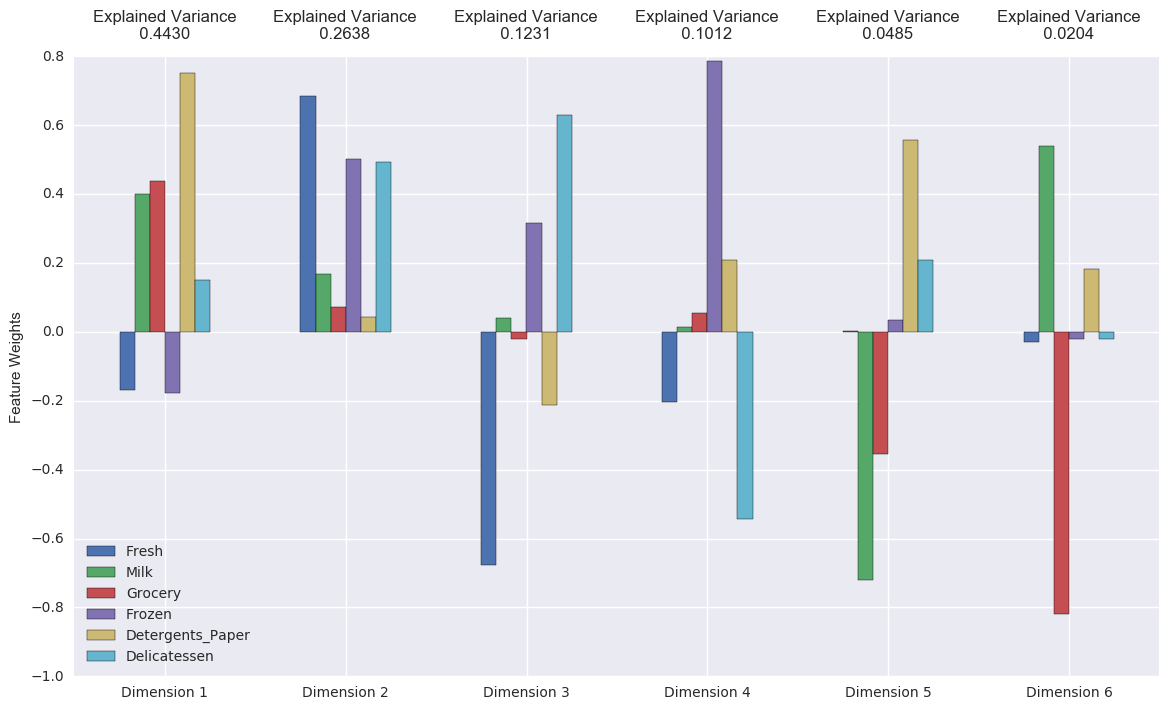

In [109]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [110]:
display(pca_results)
print "Cumulative summation of variance explained by principal components:"
display(pd.DataFrame(pca_results['Explained Variance'].cumsum()))

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


Cumulative summation of variance explained by principal components:


,Explained Variance
Dimension 1,0.4430
Dimension 2,0.7068
Dimension 3,0.8299
Dimension 4,0.9311
Dimension 5,0.9796
Dimension 6,1.0000


As we can see in teh tables ploted above, the total variance explained by the first two components is 0.7068. For the first four principal components, the total amounts to 0.9311. 

* **1st Principal Component**: The first principal component is largely explained by "Detergents_Paper". Other major variables in this component are Milk, Grocery. This is consistent with our finding at the beginning that Grocery, Milk and Detergents_Paper are highly correlated.  This component does not capture the variation in "Frozen" and "Fresh". 


* **2nd Principal Component**: The second component captures the variance in Fresh, Frozen, and Delicatessen. This suggests that direction of the second component is orthogonal to that of the first. Not surprisingly, Grocery, Milk, and Detergents_paper have small shares of the total variance explained in this principal component. 

* **3rd Principal Component**: This compoenent distinguishes between "Fresh" and the two other variables that are "Frozen" and "Delicatessen". This component is complimentary to the second. 

* **3rd Principal Component**: the fourth principal compoenent is mainly explained by "Frozen" and a large decrease in "Delicatessen" spending.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. 

In [49]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9935,1.2471,-1.2157,-0.6134,-0.6732,0.3420
1,2.7381,0.2866,0.5994,-0.5811,0.0767,-0.0216
2,-1.0043,0.4237,0.9703,0.8248,-0.4162,0.0211


###  Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we will implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [122]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [123]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9935,1.2471
1,2.7381,0.2866
2,-1.0043,0.4237


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

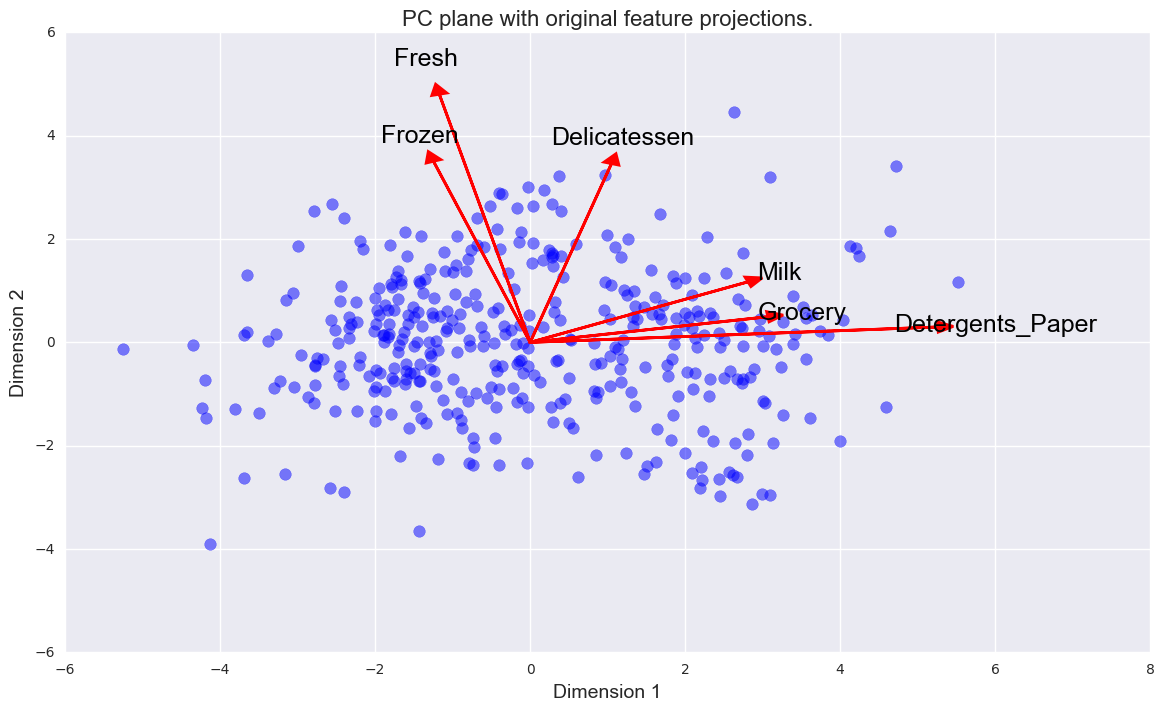

In [121]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## Clustering

In this section, we will choose to use a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. we will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

* **k_means**: K-means is categorized as a "Hard" clustering where every points is assigned to one and one only cluster. This algorithm is a partitioning technique, that is, the number of clusters has to be determined in the beginning. The algorithm randomly drops k points (i.e. k centers) and at every iteration, it changes the k centers' position, recursively, so that the distance between any given point in the data with the closest k center is minimized. This algorithm is fast, easy to understand, and very efficient for big data-sets. One drawback of this algorithm is that the final results is heavily dependent on the first random positions. Also, it is largely affected by outliers. K means is proper for cases where the clusters are distinguishable and non-uniform. 

* ** Gaussian Mixture Model (GMM)**: Unlike K-means GMM is a "Soft" clustering technique, that is, data points do not have to be assigned to only one group, but rather, depending on their position, may be assigned to more than one group. K-means, is in fact, a special case for GMM, therefore, GMM also has the disadvantage that it is still reliant on the position of the initial random centers. Another diadvantage of GMM is that it is more difficult than k-means to interpret. 

In our case, the scatter plot seems to be uniform and the clusters cannot be easilt distinguished. Therefore, GMM seems to be a reasonable choice. 




### Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we willimplement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [124]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score 

def Clusterer_GMM (k):
    #  Apply our clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return [k, score]

def multi_clusterer(lst):
    score_results = []
    for i in lst: 
        if not i<2: score_results.append(Clusterer_GMM(i))
        else:  score_results.append([i,"NA"])
    df = pd.DataFrame(score_results)
    df.columns = ['number of clusters', 'silhouette_score']
    return df

multi_clusterer(range(2,10))

,number of clusters,silhouette_score
0,2,0.443601
1,3,0.357295
2,4,0.291646
3,5,0.265822
4,6,0.307123
5,7,0.295333
6,8,0.301156
7,9,0.283717


As we can see in the table above 2 is the optimal number of clusters according to the Silhouette scores.

### Cluster Visualization
Once we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. Note that, for experimentation purposes, we are welcome to adjust the number of clusters for our clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

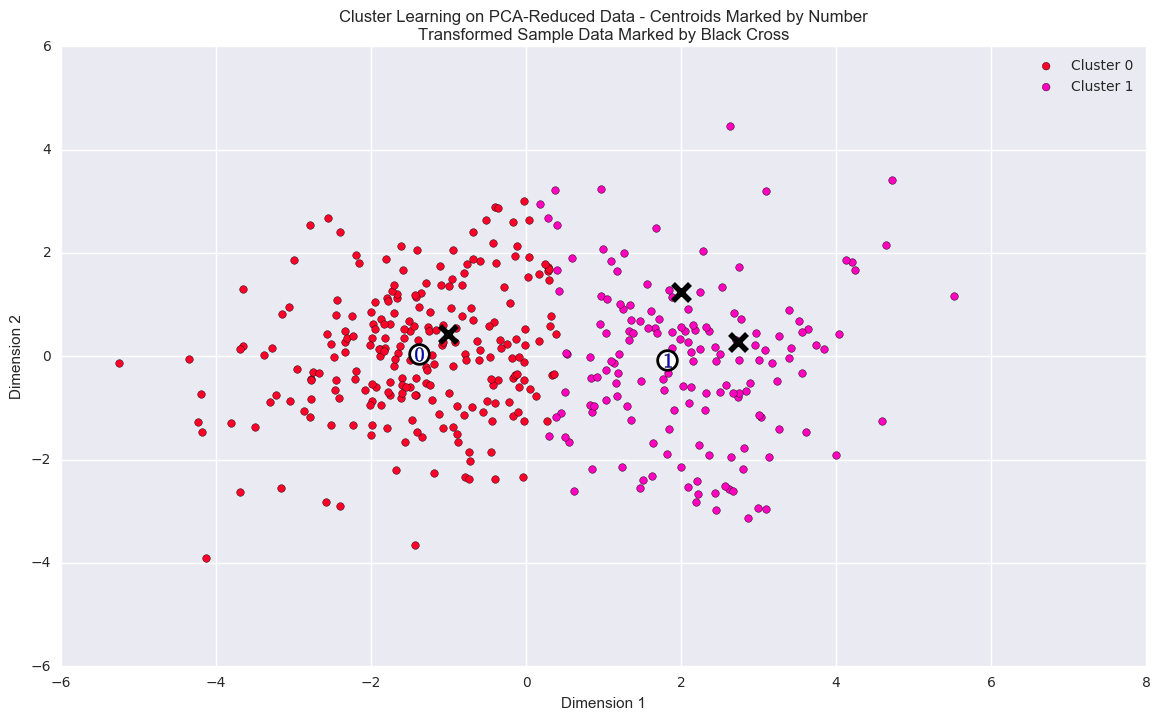

In [125]:
# Display the results of the clustering from implementation
clusterer = GMM(n_components=2, random_state=0)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we willimplement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [126]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


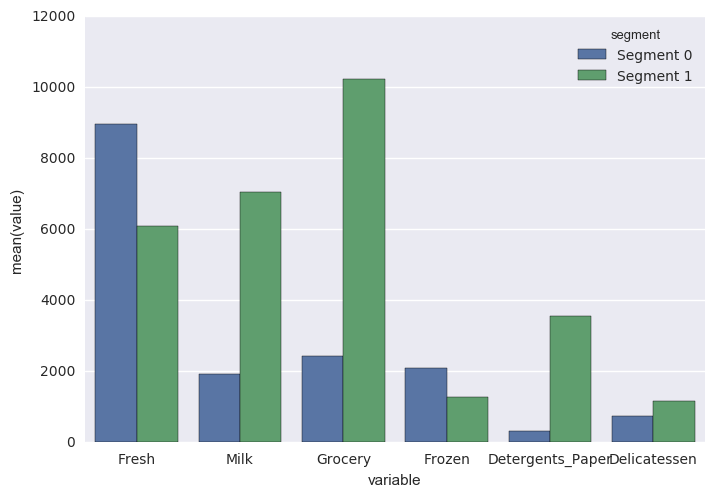

In [137]:
truecenters_pivot = pd.DataFrame(true_centers.unstack()) 
truecenters_pivot.reset_index(inplace = True)
truecenters_pivot.columns = ['variable','segment','value']
ax = sns.barplot(x="variable", y="value", hue="segment", data=truecenters_pivot)

As we can see Segment 0 is characterized by high fresh and frozen food, whereas, segment one has high amounts of milk, grocery, fresh, and detergent papers. This suggest that segment 0 is more likely to represent restaurants while segment 1 is more likely to represent retail stores. 

In [102]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


 It looks like segment 1 represents the restaurants due to high "Fresh" and segment 0 represents the retailers. Interestingly, our predictions are consistent with the model's. Sample point 0 and 1 are both in the "Retailers" category whereas sample 2 is in "Hotels/Restaurants/Cafes" cluster.


## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

We found that our clustering model found two major segments for us: "retailers" and "restaurants/cafes/hotels". The later, has high demands of fresh and frozen foods and the seconds is higher on other remaining variables. It makes sense to hypothesize that restaurants may require more frequent service due to their fresh food demand whereas retailers may not need it. We can decide which delivery method is better for which segment by randomly choosing samples from both segments first. Next, we can use A/B testing to see if changing the delivery frequency would result in a more efficient service. Our null hypothesis is that delivery frequency has no effect in customers' feedback. The alternative hypothesis is that change in delivery will have significant effect in customers' feedback. We can then test statistically to see if change in each segment is critical to the customers' satisfaction. It may make sense for the company to change its policy, accordingly.

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service. In this case, we are facing a classification problem. That is, we can use the assigned labels resulting from the clustering process as our response variable, train  a classifier, and use the trained model to classify the new customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

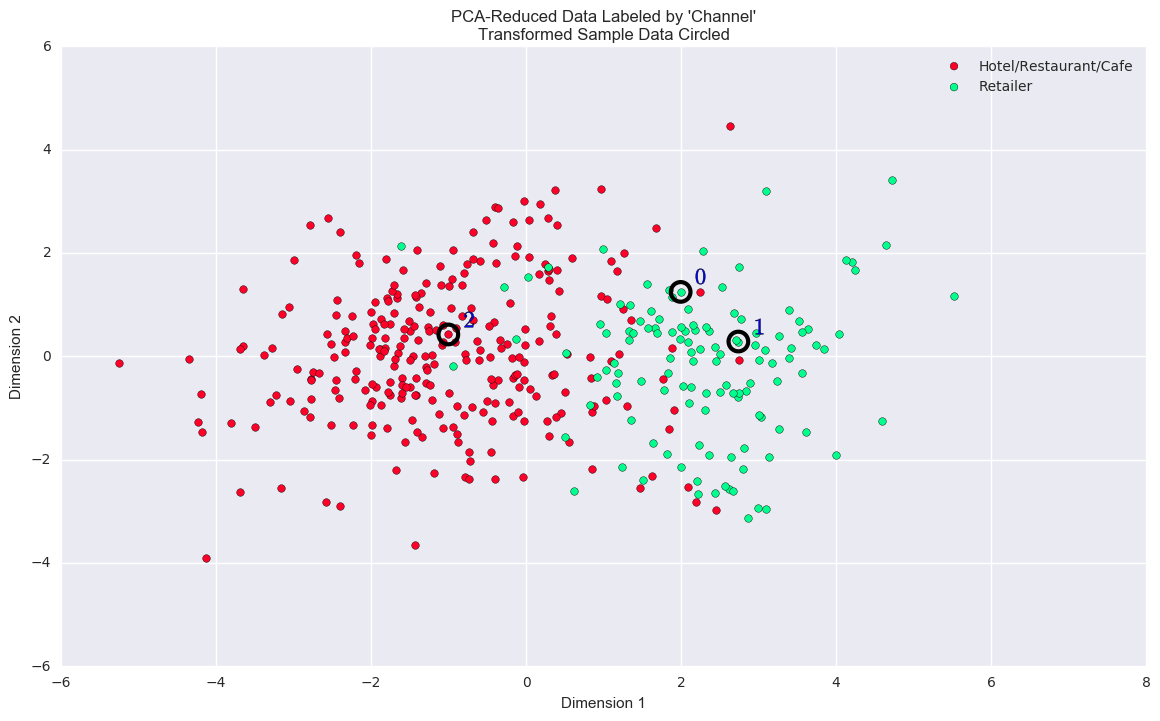

In [103]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

As we can see in the visualization above, the actual data conforms pretty well with our clusters, that is, the GMM clustering method has been able to establish the relationship between features pretty well and our choice of clustering algorithm was good. Still, there are some points from the two clusters that don't seem to be in teh right place although they are not as many. As we can see in the visualization above, the samples that we took earlier are still in the right clusters. 